<a href="https://colab.research.google.com/github/bches/OnWavelets/blob/master/WAVELETS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
from numpy.linalg import inv, norm
import matplotlib.pyplot as plt

Wavelets - in one dimension

v = W * c

v: input signal

W: Wavelet basis
(the inverse of W transofrms an input signal into the Wavelet basis)

c : Wavelet coefficients


In [10]:
W = np.array([[1,1,1,0],
              [1,1,-1,0],
              [1,-1,0,1],
              [1,-1,0,-1]])

print('W^-1 = ', inv(W))

W^-1 =  [[ 0.25  0.25  0.25  0.25]
 [ 0.25  0.25 -0.25 -0.25]
 [ 0.5  -0.5  -0.   -0.  ]
 [-0.   -0.    0.5  -0.5 ]]


Input Signal, v

In [0]:
v = np.array([6,4,5,1])

Wavelet coefficents, c, that represent the given input signal, v, in the Wavelet basis

In [23]:
c = inv(W).dot(v)
print('v=',v)
print('c=',c)

v= [6 4 5 1]
c= [4. 1. 1. 2.]


Reconstructing the input signal from the Wavelet coefs

vhat: the reconstructed signal

v: the original signal

Measure the error in the reconstruction with the second norm of the difference between v and vhat


In [14]:
vhat = W.dot(c)
print('vhat=', vhat)
print('v=',v)
print()
print('|v-vhat|2 = ', norm(v-vhat,2))

vhat= [6. 4. 5. 1.]
v= [6 4 5 1]

|v-vhat|2 =  0.0


By Recursion - calculate the wavelet coefficients by recursion, instead of a matrix multiply

i: recursion level

a: averages

d: differences

cr: coefs calculated by recursion (should be the same as c)

Start with a two sample window and double it at each step of the recursion until it spans the whole input vector (the length of the input vector is an even power of 2).  The input to the first step is the input signal, but at successive steps, the input is the windowed average from the previous step. At each step, calculate the average over the window and store it; also store the residual information (difference) from the input to that step.  At each step the differences generate the coefs inreverse order, except for the last step which stores the last average in the first coef.

In [26]:
N = len(v)
cr = np.zeros_like(v)

i = 1
aprev = v
a = np.zeros_like(v)
for j in range(0,N,2**i):
  a[j:j+2**i] = np.average(v[j:j+2**i])  
d = aprev - a
cr[2] = norm(d[:2**i], 1) / (N/2)
cr[3] = norm(d[2**i:], 1) / (N/2)
print('recursion level {}: a = {}, d = {} => cr[2]={}, cr[3]={}'.format(i,a,d,cr[2],cr[3]))
print()

i = 2
aprev = a
a = np.zeros_like(v)
for j in range(0,N,2**i):
  a[j:j+2**i] = np.average(v[j:j+2**i])  
d = aprev - a
cr[0] = norm(a, 1) / N
cr[1] = norm(d, 1) / N
print('recursion level {}: a = {}, d = {} => cr[0]={}, cr[1]={}'.format(i,a,d,cr[0],cr[1]))
print()

print('c=',c)
print('cr=',cr)
print('|c-cr|2 =', norm(c-cr,2))

recursion level 1: a = [5 5 3 3], d = [ 1 -1  2 -2] => cr[2]=1, cr[3]=2

recursion level 2: a = [4 4 4 4], d = [ 1  1 -1 -1] => cr[0]=4, cr[1]=1

c= [4. 1. 1. 2.]
cr= [4 1 1 2]
|c-cr|2 = 0.0


Compression

The input signal needs 3 bits to encode each of the four values, for a total of 12 bits.

The compressed signal could use 2 bits for each of the four values, for a total of 8 bits.

The first norm of the input signal, v, and the compressed signal, c, show that the compressed signal uses smaller numbers than the original signal.  The following plot shows it too.

If the coefs continue to get smaller and go to 0 then the Wavelet transform results in working with sparse coefficients, instead of a dense input signal.

|v|1 = 16.0
|c|1 = 8.0


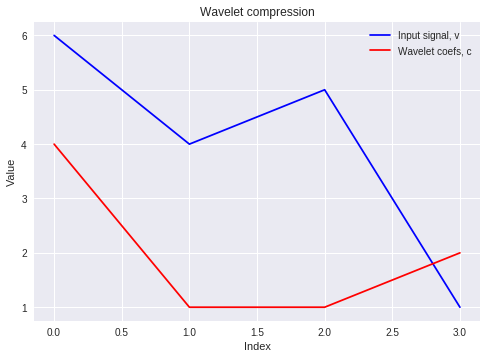

In [29]:
plt.plot(v,'b')
plt.plot(c,'r')
plt.legend(['Input signal, v', 'Wavelet coefs, c'])
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Wavelet compression')

print('|v|1 =', norm(v,1))
print('|c|1 =', norm(c,1))